<a href="https://colab.research.google.com/github/MartinPdeS/PyMieSim/blob/master/PyMieSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build latest package version
============================


In [1]:
# Do not uncomment the next lines!
# !mkdir Project
# !rm -rf Project/PyMieSim
# !cd Project && git clone https://github.com/MartinPdeS/PyMieSim.git
# !cd Project/PyMieSim && git submodule init && git submodule update
# !python -m pip uninstall PyMieSim -y && cd Project/PyMieSim && cmake . && sudo make install && python -m pip install .

!python -m pip install PyMieSim==1.9.0 --no-cache-dir --quiet

Experiment imports
------------------

In [3]:
import numpy as np
from PyMieSim.experiment import Sphere, Gaussian, Photodiode, Setup
from PyMieSim import measure

Scattering efficiency VS scatterer diameter
-------------------------------------------

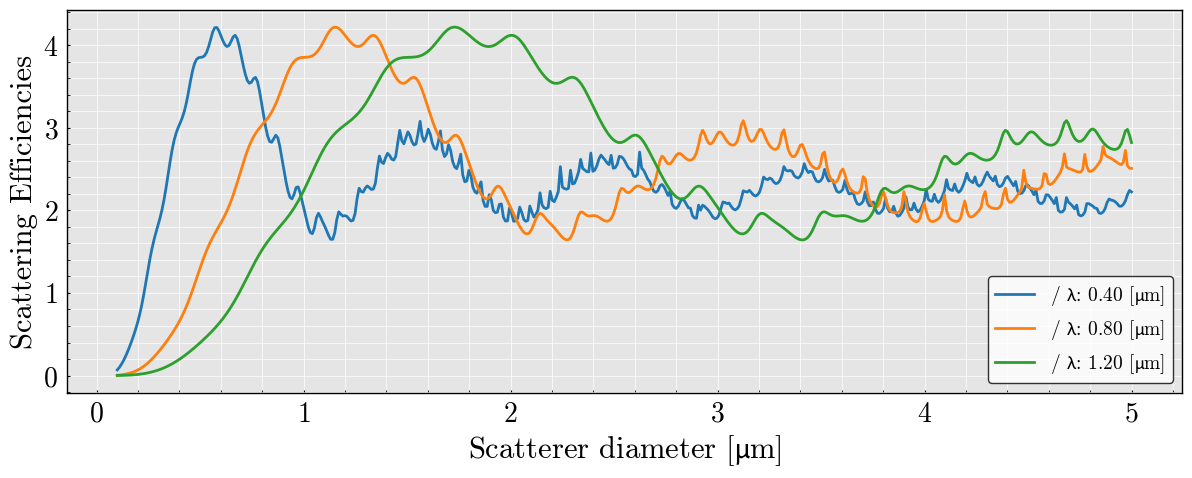

In [20]:
source = Gaussian(
    wavelength=[400e-9, 800e-9, 1200e-9],
    polarization_value=0,
    polarization_type='linear',
    NA=0.3,
    optical_power=1e-3
)

scatterer = Sphere(
    diameter=np.linspace(100e-9, 5000e-9, 500),
    index=1.44,
    medium_index=1,
    source=source
)

setup = Setup(
    source=source,
    scatterer=scatterer,
    detector=None
)

DataSet = setup.get(measure.Qsca)

figure = DataSet.plot(
    x=setup.diameter,
)

_ = figure.show()

Coupling measurement VS detector angle for different detector sampling
----------------------------------------------------------------------

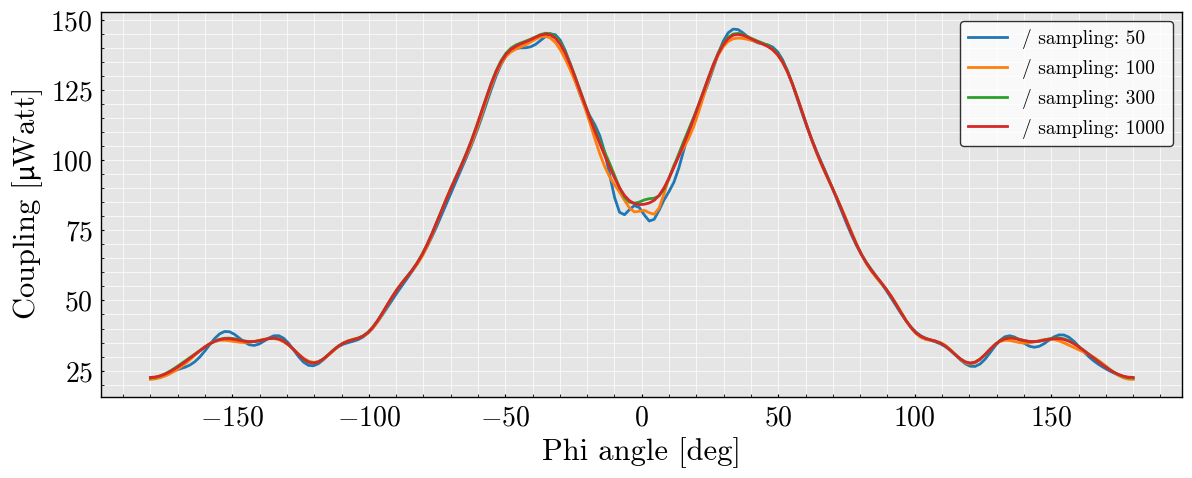

In [18]:
source = Gaussian(
    wavelength=400e-9,
    polarization_value=90,
    polarization_type='linear',
    optical_power=1e-3,
    NA=0.3
)

scatterer = Sphere(
    diameter=1200e-9,
    index=1.44,
    medium_index=1,
    source=source
)

detector = Photodiode(
    NA=[0.4],
    phi_offset=np.linspace(-180, 180, 200),
    gamma_offset=30,
    sampling=[50, 100, 300, 1000],
    polarization_filter=0
)

setup = Setup(
    source=source,
    scatterer=scatterer,
    detector=detector
)

data_set = setup.get(measure.coupling)

figure = data_set.plot(
    x=setup.phi_offset,
)

_ = figure.show()